# Lab Experiment 05: Placement Analysis

## 1. Introduction
In this notebook, we will analyze a placement dataset to understand the factors influencing student placements. We will perform:
- Data Loading and Exploration
- Handling Missing Values
- Correlation Analysis
- Data Visualization (Scatter plots, Box plots)
- Outlier Detection

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importing Libraries
First, we import the necessary libraries.

In [ ]:
df = pd.read_csv("Placement_Data.csv")
print(df.head())

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


## 3. Data Loading
Load the dataset and display the first few rows.

In [4]:
print(df.describe())

            sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  


In [5]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## 4. Data Exploration
We will explore the dataset to understand its structure, categorical variables, and summary statistics.

In [6]:
df.status.value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [ ]:
df.columns
Cat_col = [
    "gender",
    "ssc_b",
    "hsc_b",
    "hsc_s",
    "degree_t",
    "workex",
    "specialisation",
    "status",
]
num_col = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p", "salary"]
for i in Cat_col:
    print("Column_Name=", i)
    print(df[i].value_counts())

Column_Name= gender
gender
M    139
F     76
Name: count, dtype: int64
Column_Name= ssc_b
ssc_b
Central    116
Others      99
Name: count, dtype: int64
Column_Name= hsc_b
hsc_b
Others     131
Central     84
Name: count, dtype: int64
Column_Name= hsc_s
hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64
Column_Name= degree_t
degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64
Column_Name= workex
workex
No     141
Yes     74
Name: count, dtype: int64
Column_Name= specialisation
specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64
Column_Name= status
status
Placed        148
Not Placed     67
Name: count, dtype: int64


In [ ]:
df.fillna(0, inplace=True)

## 5. Handling Missing Values
We will fill missing values (e.g., in the salary column for unplaced students) with 0.

In [9]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


## 6. Correlation Analysis
We will compute and visualize the correlation matrix to understand relationships between numerical variables.

A Correlation matrix shows how strongly pairs of numerical variables are related to each other.

In [ ]:
corr_matrix = df.corr(numeric_only=True)

In [11]:
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
             sl_no     ssc_p     hsc_p  degree_p   etest_p     mba_p    salary
sl_no     1.000000 -0.078155 -0.085711 -0.088281  0.063636  0.022327  0.002543
ssc_p    -0.078155  1.000000  0.511472  0.538404  0.261993  0.388478  0.538090
hsc_p    -0.085711  0.511472  1.000000  0.434206  0.245113  0.354823  0.452569
degree_p -0.088281  0.538404  0.434206  1.000000  0.224470  0.402364  0.408371
etest_p   0.063636  0.261993  0.245113  0.224470  1.000000  0.218055  0.186988
mba_p     0.022327  0.388478  0.354823  0.402364  0.218055  1.000000  0.139823
salary    0.002543  0.538090  0.452569  0.408371  0.186988  0.139823  1.000000


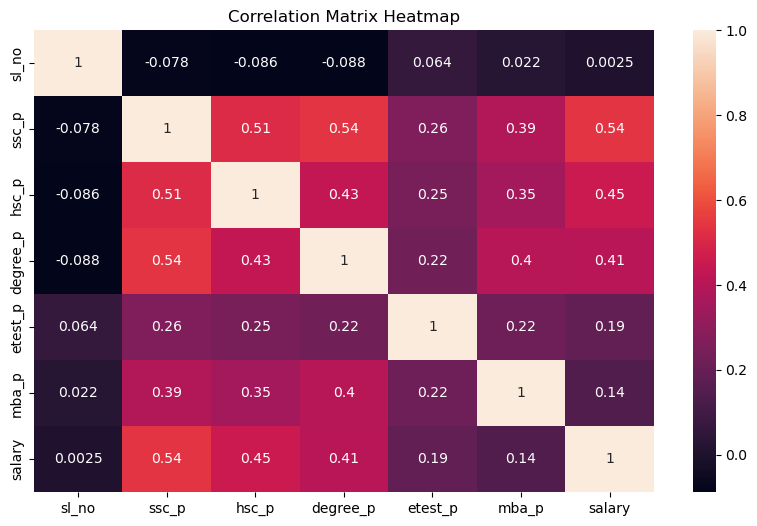

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)

plt.title("Correlation Matrix Heatmap")
plt.show()

## 7. Data Visualization
Visualizing relationships between variables using scatter plots and pair plots.

It shows data in a visual form like charts,graphs,or plots instead of plain numbers or tables.

Text(0.5, 1.0, 'Scatter plot between 10th and 12th percentage')

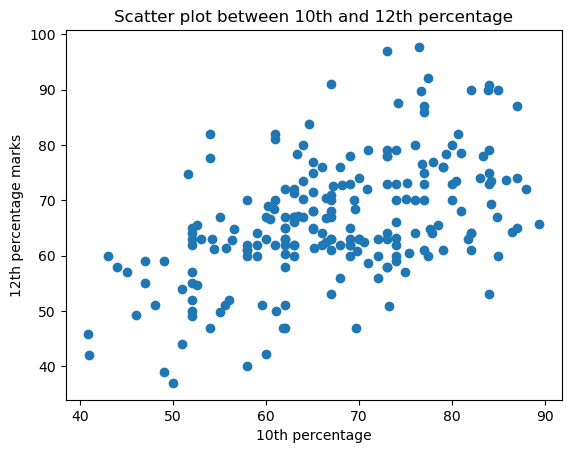

In [ ]:
plt.scatter(df["ssc_p"], df["hsc_p"])
plt.xlabel("10th percentage")
plt.ylabel("12th percentage marks")
plt.title("Scatter plot between 10th and 12th percentage")

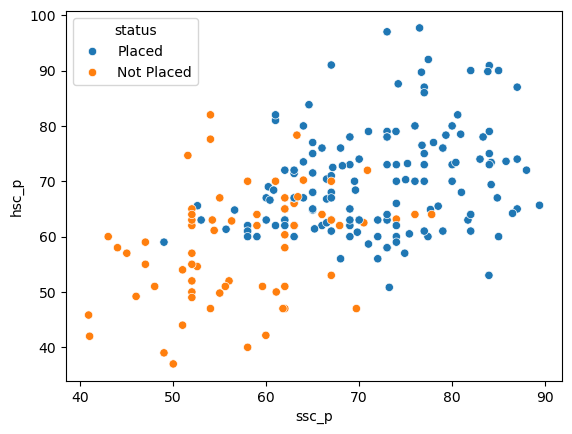

In [ ]:
sns.scatterplot(x="ssc_p", y="hsc_p", data=df, hue="status")
colors = {"Place": "tab green", "Not Placed": "tab:red"}

<Axes: xlabel='ssc_p', ylabel='mba_p'>

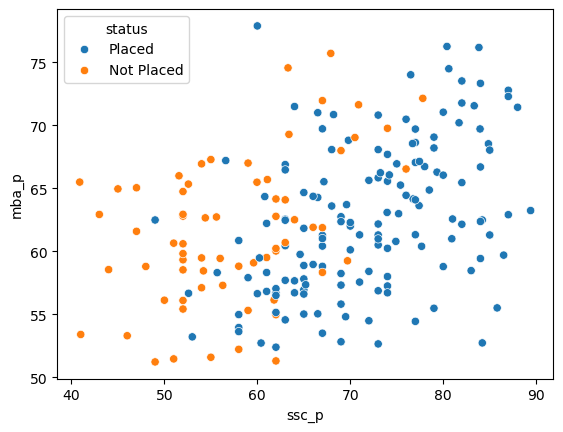

In [ ]:
sns.scatterplot(x="ssc_p", y="mba_p", data=df, hue="status")

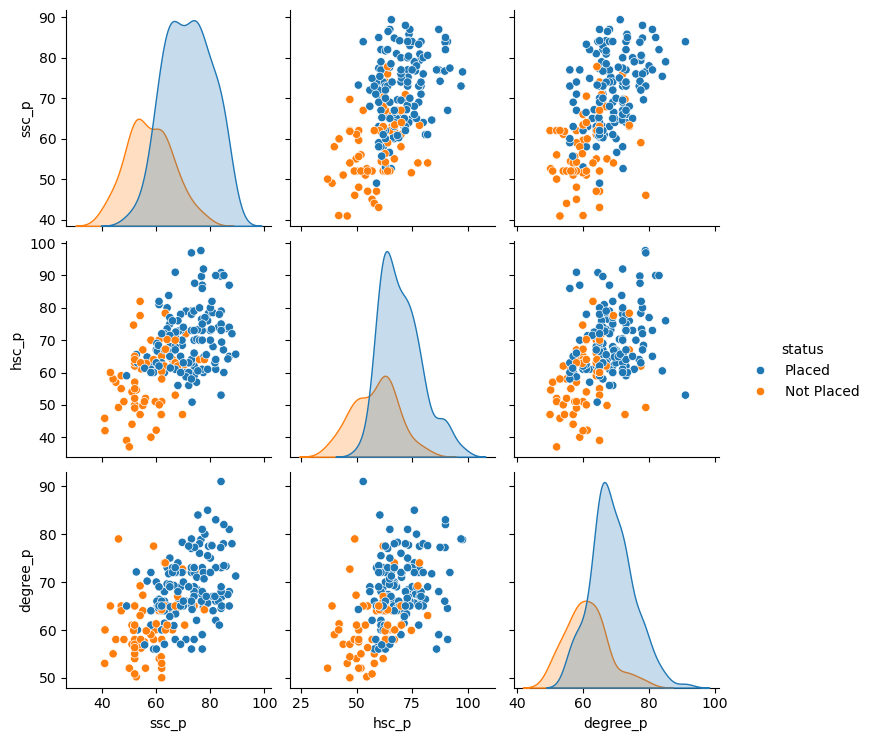

In [ ]:
p_df = df[["ssc_p", "hsc_p", "degree_p", "status"]]
sns.pairplot(p_df, hue="status")

## 8. Box Plots and Outliers
Using box plots to visualize the distribution of salaries and identify outliers.

A boxplot(also called a box-and-whisker plot) is a graph that shows how data is spread out- icluding its minimum, maximum, median, and outliers.

<Axes: ylabel='salary'>

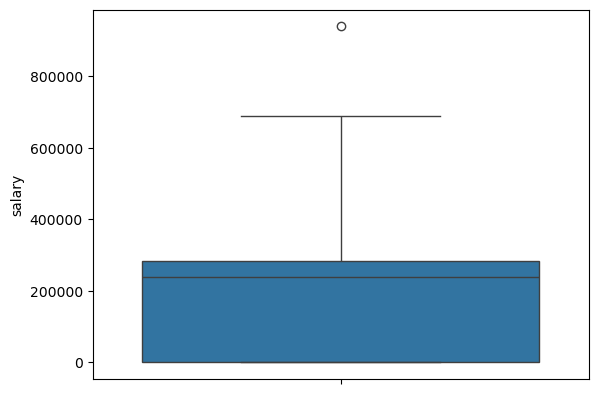

In [ ]:
sns.boxplot(y="salary", data=df)

**Outliers**

Outliers are data points that are very different(much lower or higher) from the rest of the data.

In [ ]:
percentile25 = df["ssc_p"].quantile(0.25)
percentile25

60.599999999999994

In [ ]:
percentile75 = df["ssc_p"].quantile(0.75)
print(percentile75)
iqr = percentile75 - percentile25
iqr

75.7


15.100000000000009

In [ ]:
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)
print(upper_limit, lower_limit)

98.35000000000002 37.94999999999998


In [ ]:
col = ["ssc_p", "hsc_p", "degree_p", "mba_p", "salary"]

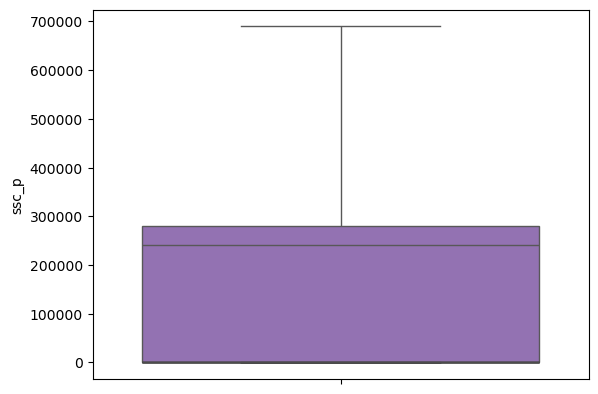

In [ ]:
for c in col:
    percentile25 = df[c].quantile(0.25)
    percentile75 = df[c].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + (1.5 * iqr)
    lower_limit = percentile25 - (1.5 * iqr)
    df = df[df[c] < upper_limit]
    df = df[df[c] > lower_limit]
    plt.figure
    sns.boxplot(y=c, data=df)

**Hot Encoding**

One-Hot Encoding is a method used to convert categorical data(text labels) into numerical form because ML models can't directly understand text.

In [ ]:
X = df.iloc[:, 0:-2].values
Y = df[["salary"]].values
X
Y

array([[270000.],
       [200000.],
       [250000.],
       [     0.],
       [425000.],
       [     0.],
       [     0.],
       [252000.],
       [231000.],
       [     0.],
       [260000.],
       [250000.],
       [     0.],
       [218000.],
       [     0.],
       [200000.],
       [300000.],
       [     0.],
       [     0.],
       [236000.],
       [265000.],
       [393000.],
       [360000.],
       [300000.],
       [     0.],
       [240000.],
       [265000.],
       [350000.],
       [     0.],
       [250000.],
       [     0.],
       [278000.],
       [260000.],
       [     0.],
       [300000.],
       [     0.],
       [320000.],
       [240000.],
       [411000.],
       [287000.],
       [     0.],
       [300000.],
       [200000.],
       [     0.],
       [     0.],
       [204000.],
       [250000.],
       [200000.],
       [     0.],
       [     0.],
       [450000.],
       [216000.],
       [220000.],
       [240000.],
       [360000.],
       [26

In [ ]:
X = df.iloc[:, 0:-2].values
X

array([[1, 'M', 67.0, ..., 55.0, 'Mkt&HR', 58.8],
       [2, 'M', 79.33, ..., 86.5, 'Mkt&Fin', 66.28],
       [3, 'M', 65.0, ..., 75.0, 'Mkt&Fin', 57.8],
       ...,
       [213, 'M', 67.0, ..., 59.0, 'Mkt&Fin', 69.72],
       [214, 'F', 74.0, ..., 70.0, 'Mkt&HR', 60.23],
       [215, 'M', 62.0, ..., 89.0, 'Mkt&HR', 60.22]], dtype=object)

In [ ]:
df_encode = pd.get_dummies(df, drop_first=False, dtype="int")

In [35]:
df_encode

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,...,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,...,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,...,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
211,212,58.00,60.00,72.00,74.0,53.62,275000.0,0,1,0,...,1,0,0,1,1,0,1,0,0,1
212,213,67.00,67.00,73.00,59.0,69.72,295000.0,0,1,0,...,0,1,0,0,0,1,1,0,0,1
213,214,74.00,66.00,58.00,70.0,60.23,204000.0,1,0,0,...,0,1,0,0,1,0,0,1,0,1


In [36]:
df_encode.columns

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender_F', 'gender_M', 'ssc_b_Central', 'ssc_b_Others',
       'hsc_b_Central', 'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_No', 'workex_Yes',
       'specialisation_Mkt&Fin', 'specialisation_Mkt&HR', 'status_Not Placed',
       'status_Placed'],
      dtype='object')

In [ ]:
print(df_encode.columns)
for i in df.columns:
    print(i, df[i].unique())

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender_F', 'gender_M', 'ssc_b_Central', 'ssc_b_Others',
       'hsc_b_Central', 'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_No', 'workex_Yes',
       'specialisation_Mkt&Fin', 'specialisation_Mkt&HR', 'status_Not Placed',
       'status_Placed'],
      dtype='object')
sl_no [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  44  45  46  47  48  49  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 122 123 124 125 126 127 128 129 130 131
 132 133 134 136 137 138 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=45
)

In [40]:
Y_train.shape

(164, 1)

In [ ]:
Y_test.shape

(41, 1)

**Feature Scaling**

feature scaling is used if one column values are more in width then others columns it will be normalised to bring all features to same scale.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

target_col = "hsc_p"
X = df.drop(target_col, axis=1)
y = df[target_col]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

mm = MinMaxScaler()
mm.fit(X_train)

X_train_scaled = mm.transform(X_train)
X_test_scaled = mm.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print(X_test_scaled_df.head())

      sl_no     ssc_p  degree_p   etest_p     mba_p    salary  gender_M  \
0  0.070093  0.497011  0.542857  0.468085  0.502632  0.289855       0.0   
1  0.042056  0.352711  0.314286  0.085106  0.034586  0.000000       1.0   
2  0.481308  0.661925  0.657143  0.744681  0.546617  0.347826       1.0   
3  0.644860  0.847454  0.657143  0.978723  0.769925  0.362319       0.0   
4  0.331776  0.703154  0.600000  0.957447  0.588346  0.347826       1.0   

   ssc_b_Others  hsc_b_Others  hsc_s_Commerce  hsc_s_Science  degree_t_Others  \
0           0.0           0.0             1.0            0.0              0.0   
1           0.0           0.0             1.0            0.0              0.0   
2           0.0           0.0             0.0            1.0              0.0   
3           1.0           1.0             0.0            1.0              0.0   
4           1.0           1.0             1.0            0.0              0.0   

   degree_t_Sci&Tech  workex_Yes  specialisation_Mkt&HR  statu

In [ ]:
X_test = mm.transform(X_test)

In [44]:
print(pd.DataFrame(X_test).head())

         0         1         2         3         4         5    6    7    8   \
0  0.070093  0.497011  0.542857  0.468085  0.502632  0.289855  0.0  0.0  0.0   
1  0.042056  0.352711  0.314286  0.085106  0.034586  0.000000  1.0  0.0  0.0   
2  0.481308  0.661925  0.657143  0.744681  0.546617  0.347826  1.0  0.0  0.0   
3  0.644860  0.847454  0.657143  0.978723  0.769925  0.362319  0.0  1.0  1.0   
4  0.331776  0.703154  0.600000  0.957447  0.588346  0.347826  1.0  1.0  1.0   

    9    10   11   12   13   14   15  
0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  1.0  0.0  1.0  1.0  1.0  1.0  
3  0.0  1.0  0.0  1.0  1.0  0.0  1.0  
4  1.0  0.0  0.0  0.0  0.0  0.0  1.0  


In [45]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train, Y_train)

LinearRegression()

In [63]:
type(X_test)

numpy.ndarray

In [ ]:
import pandas as pd

X_test = pd.DataFrame(X_test, columns=X_train.columns)

In [ ]:
import warnings

warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
pd.concat([pd.DataFrame(Y_pred), pd.DataFrame(Y_test)], axis=1)

,0,hsc_p
0,19.911671,NaN
1,15.214089,NaN
2,17.452073,NaN
3,13.421525,NaN
4,21.268040,NaN
...,...,...
151,NaN,65.0
58,NaN,62.0
47,NaN,60.0
87,NaN,51.0


In [69]:
pd.DataFrame(Y_pred)

,0
0,19.911671
1,15.214089
2,17.452073
3,13.421525
4,21.268040
5,22.646129
6,16.285019
7,10.489333
8,14.580219
9,8.587403


Text(0.5, 1.0, 'Residuals Analysis to find that how much model perform')

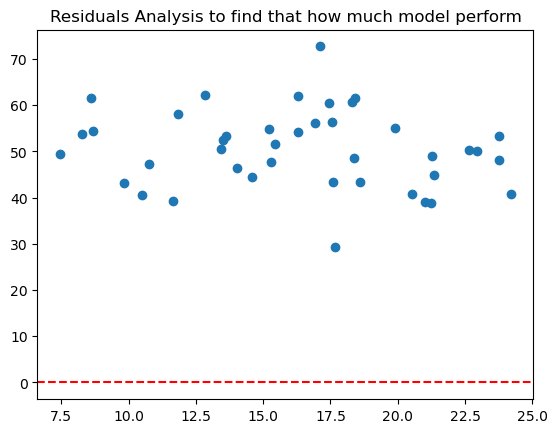

In [ ]:
residuals = Y_test - Y_pred
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color="r", linestyle="--")
plt.title("Residuals Analysis to find that how much model perform")

**Analysis of Plot**

Residuals seem to show a clear pattern:

High +ve and -ve residuals appear for mid-range predictions.

A slight curve or systematic structure is noticeable,which suggests the model is biased.

The fact that residuals are not randomly scattered indicates the model is not capturing the relationship perfectly.


**Conclusion: Model likely suffers from bias**

Next step to improve:

1. Try a more complex model.

2. Perform feature engineering to capture non-linear effects.

3. Check for data issues.

4. Perform cross-validation to avoid overfitting.

In [74]:
np.mean(residuals)

50.49938957407288

In [75]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(Y_test, Y_pred)

2619.458635496405

In [ ]:
import numpy as np

np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

51.1806470796961

In [ ]:
metrics.r2_score(Y_test, Y_pred)

-32.554359584476096

In [ ]:
pd.DataFrame(X_train)

,sl_no,ssc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
69,70,73.0,66.0,70.00,68.07,275000.0,True,False,False,False,True,False,True,True,False,True
114,115,65.0,69.0,53.70,55.01,250000.0,True,False,True,False,True,False,False,False,True,True
159,160,52.0,58.0,62.00,60.59,0.0,True,False,True,True,False,False,False,False,True,False
99,100,54.0,63.0,50.00,59.47,0.0,True,False,True,True,False,False,True,False,False,False
39,40,81.0,64.0,93.00,62.56,411000.0,True,True,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,110,52.0,65.0,86.00,56.09,0.0,True,False,True,False,True,False,True,True,True,False
14,15,62.0,50.0,76.00,54.96,0.0,True,False,False,True,False,False,False,False,True,False
95,96,73.0,65.0,95.46,62.16,420000.0,True,False,True,True,False,False,False,True,False,True
187,188,78.5,67.0,95.00,64.86,280000.0,True,False,False,False,True,False,True,True,False,True
